<a href="https://colab.research.google.com/github/DaniilAszn/ML2_course/blob/main/6_%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%84%D0%BE%D1%80%D0%BC%D0%B5%D1%80%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6 практика по NN by RTU MIREA**

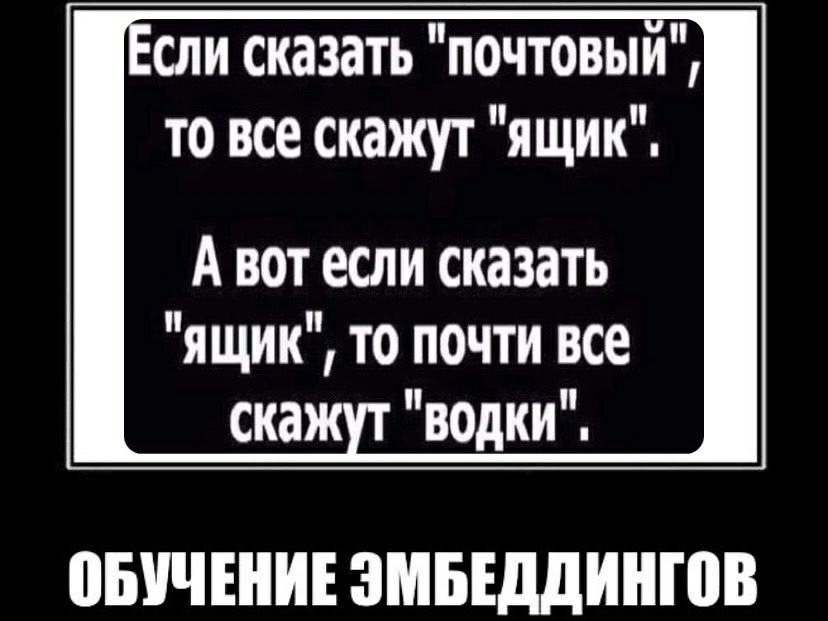

## Шаг 0: Подготовка датасета

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm.notebook import tqdm

plt.rcParams.update({'font.size': 14})
sns.set_style('whitegrid')

In [ ]:
!pip install torchdata

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
from keras.datasets import imdb

In [ ]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data()

word_index = imdb.get_word_index()

start_char = 1
oov_char = 2
index_from = 3

inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)

inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

train_set = np.array([" ".join(inverted_word_index[i] for i in item) for item in training_data])
test_set = np.array([" ".join(inverted_word_index[i] for i in item) for item in testing_data])


1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
train_set.shape, test_set.shape

((25000,), (25000,))

In [ ]:
train_set[101]

'[START] whoever wrote up redline as a great car movie must be getting paid off by daniel sadek to promote this ultra crappy flaming steaming pile of amateur crap easily the worst automotive movie or any movie ever made this makes showgirls look like citizen kane br br take every cheesy cliché out of an 80s action tv series put in some really crappy special effects and lame characters with no relevance and you have living proof that daniel sadek should not write screenplays and produce movies but should remain in the real estate business br br this is such a lame movie with such a lame plot and the most contrived action sequences ever what offends me is not that the makers of this film are idiots but that they consider the movie going public to be idiots enough to fall for this crap'

In [ ]:
training_targets[101]

0

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess(text):
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = list(lemmatizer.lemmatize(word) for word in text)
    text = list(word for word in text if word not in stop_words)
    return ' '.join(text)

In [ ]:
train_set_prep = [preprocess(row) for row in train_set]
test_set_prep = [preprocess(row) for row in test_set]

In [ ]:
train_set_prep[101]

'start whoever wrote redline great car movie must getting paid daniel sadek promote ultra crappy flaming steaming pile amateur crap easily worst automotive movie movie ever made make showgirl look like citizen kane br br take every cheesy cliché action tv series put really crappy special effect lame character relevance living proof daniel sadek write screenplay produce movie remain real estate business br br lame movie lame plot contrived action sequence ever offends maker film idiot consider movie going public idiot enough fall crap'

## Шаг 1: Baseline с логистической регрессией

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
tf_idf = TfidfVectorizer().fit(train_set_prep)
train_tf_idf = tf_idf.transform(train_set_prep)
test_tf_idf = tf_idf.transform(test_set_prep)

In [ ]:
log_regr = LogisticRegression(n_jobs=-1).fit(train_tf_idf, training_targets)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
print(f'Train accuracy: {accuracy_score(training_targets, log_regr.predict(train_tf_idf)):.5f}')
print(f'Test accuracy: {accuracy_score(testing_targets, log_regr.predict(test_tf_idf)):.5f}')

Train accuracy: 0.93400
Test accuracy: 0.88008


## Шаг 2: Построение и обучение трансформера

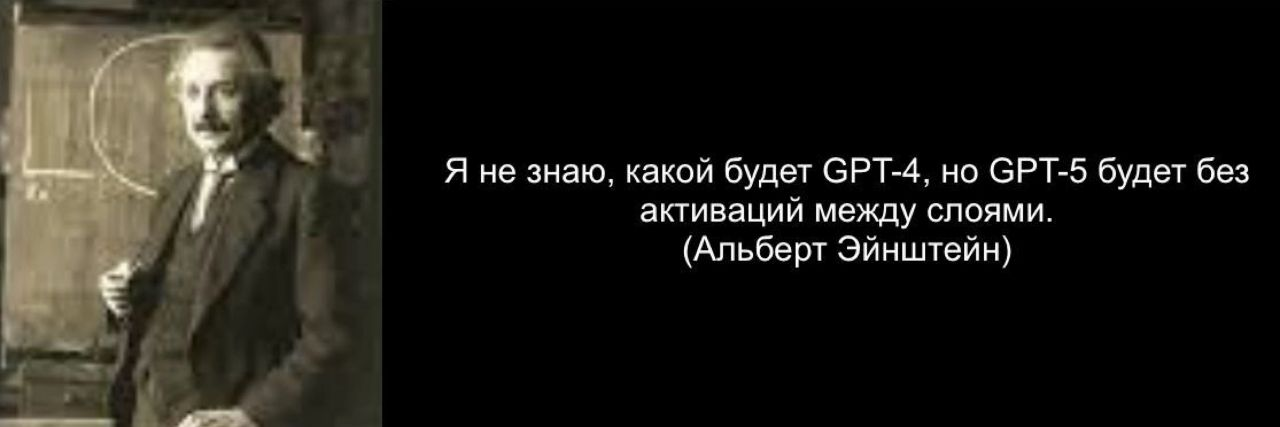

### Токенизация

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

def dataset_iterator(texts):
    for text in texts:
        yield text.split()

In [ ]:
vocab = build_vocab_from_iterator(
    dataset_iterator(train_set),
    specials=['<pad>', '<unk>'], min_freq=10,
)

In [ ]:
train_tokens = []
for text in dataset_iterator(train_set):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    train_tokens += [tokens]

test_tokens = []
for text in dataset_iterator(test_set):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    test_tokens += [tokens]

In [ ]:
train_tokens[101][:10]

[30, 2503, 1041, 55, 19203, 15, 4, 87, 518, 18]

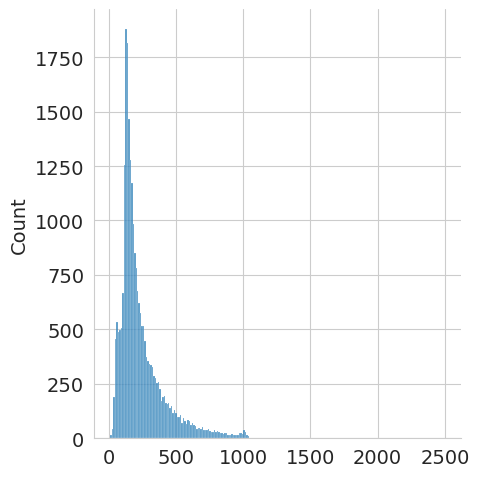

In [ ]:
lengths = np.array([len(tokens) for tokens in train_tokens])
sns.displot(lengths)
plt.show()

In [ ]:
max_length = 256
tokenized_train = torch.full((len(train_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(train_tokens):
    length = min(max_length, len(tokens))
    tokenized_train[i, :length] = torch.tensor(tokens[:length])

tokenized_test = torch.full((len(test_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(test_tokens):
    length = min(max_length, len(tokens))
    tokenized_test[i, :length] = torch.tensor(tokens[:length])

In [ ]:
targets_train = torch.tensor(training_targets, dtype=torch.int32)
targets_test = torch.tensor(testing_targets, dtype=torch.int32)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(tokenized_train, targets_train)
test_dataset = TensorDataset(tokenized_test, targets_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=2, pin_memory=True)

### Сборка [трансформера](https://habr.com/ru/articles/486358/)

**Positional Encoding**

Позиционное кодирование используется для ввода информации о положении каждого токена во входную последовательность. Он использует функции синуса и косинуса разных частот для генерации позиционного кодирования.

In [ ]:
import math
from torch import nn

class PositionalEncoder(nn.Module):
    # https://pytorch.org/tutorials/beginner/transformer_tutorial.html

    def __init__(self, max_length, embed_dim, dropout):
        super().__init__()
        # признаки для кодирования позиций (пока нет)
        self.pos_features = torch.zeros(max_length, embed_dim)

        # позиции от 0 до макс длины
        positions = torch.arange(0, max_length, dtype=torch.float).unsqueeze(1)

        # генерация вектора частот
        freqs = torch.exp(torch.arange(0, embed_dim, 2, dtype=torch.float) * \
                          (-math.log(10000) / embed_dim)).unsqueeze(0)

        # заполнение синусами/косинусами
        arguments = positions * freqs
        self.pos_features[:, 0::2] = torch.sin(arguments)
        self.pos_features[:, 1::2] = torch.cos(arguments)
        self.pos_features = self.pos_features.unsqueeze(0)

        # добавление доп параметров, которые не нужно градиентить
        self.pos_features = nn.Parameter(self.pos_features, requires_grad=False)

        self.dropout = nn.Dropout(dropout)

    def forward(self, inputs):
        outputs = inputs + self.pos_features[:, :inputs.shape[1]]
        return self.dropout(outputs)

На следующем изображении каждая строка соответствует вектору позиционного кодирования: так, первая строка будет вектором, который мы добавляем к эмбеддингу первого слова во входной последовательности, вторая строка — к эмбеддингу второго слова и т.д. Каждая строка содержит 512 значений от -1 до 1. Мы перенесли эти значения в цвета, чтобы шаблон был более нагляден.

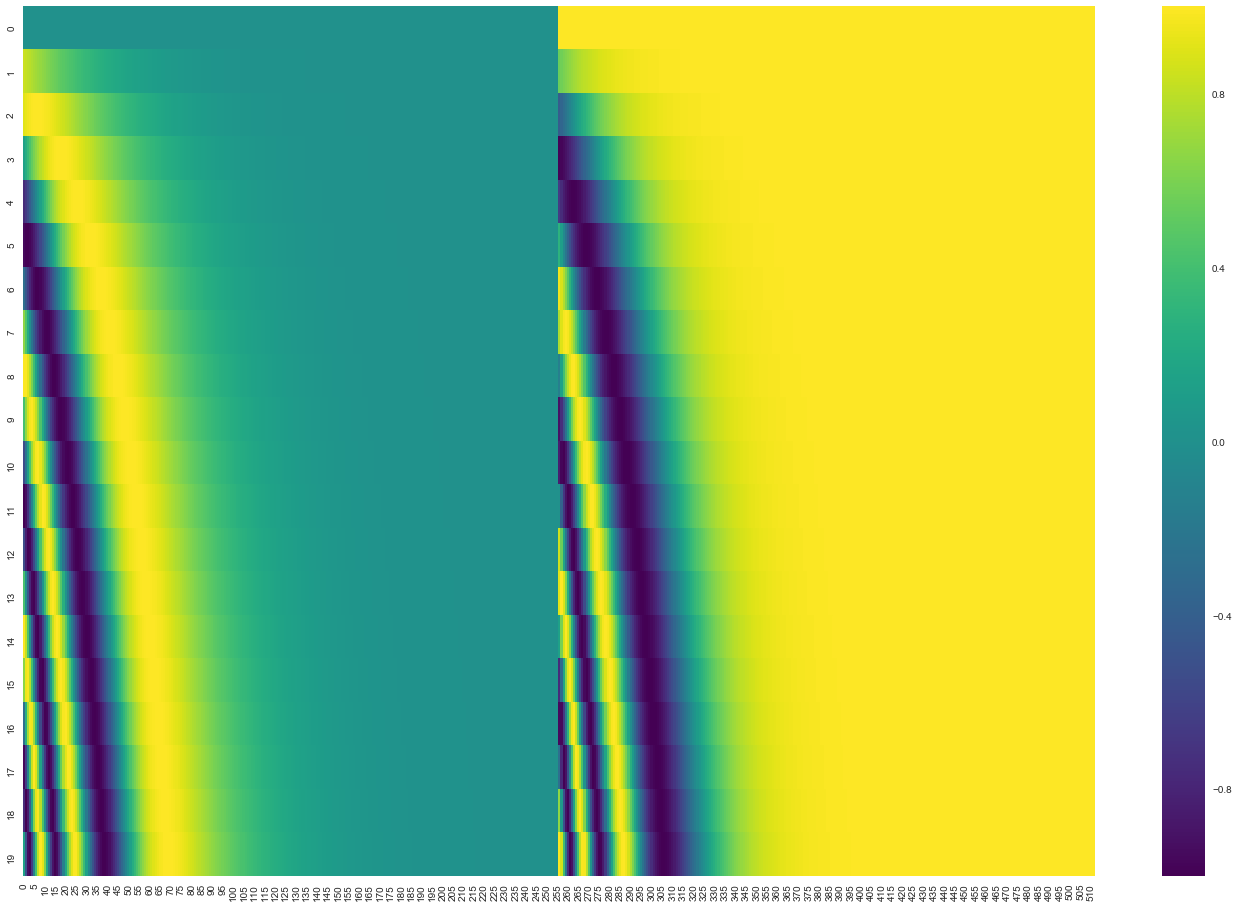

Ось Х: длина текста

ось У: размерность эмбеда

![](https://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png)

**Attention & MultiHeadAttention**

Создаём внимание и объединяем.

In [ ]:
class Attention(nn.Module):
    # Single-head attention
    def __init__(self, embed_dim, num_heads, dropout):
        super().__init__()
        attention_dim = embed_dim // num_heads

        self.WQ = nn.Linear(embed_dim, attention_dim, bias=False)
        self.WK = nn.Linear(embed_dim, attention_dim, bias=False)
        self.WV = nn.Linear(embed_dim, attention_dim, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, query, key, value, mask=None):
        # query, key, value: (batch_size, length, embed_dim)
        # mask: (batch_size, length, length)

        Q = self.WQ(query)
        K = self.WK(key)
        V = self.WV(value)
        # Q, K, V: (batch_size, length, attention_dim)

        # нормировочная константа
        norm_factor = math.sqrt(Q.shape[-1])

        # находим произведения для каждого батча
        dot_products = torch.bmm(Q, K.transpose(1, 2)) / norm_factor
        # размерность dot_products: (batch_size, length, length)

        # Маска - чтоб делать Attention в декодере
        if mask is not None:
            dot_products = dot_products.masked_fill(mask, -math.inf)

        attention_score = nn.functional.softmax(dot_products, dim=-1)
        attention = torch.bmm(self.dropout(attention_score), V)
        # attention_score: (batch_size, length, length)
        # attention: (batch_size, length, attention_dim)

        return attention, attention_score


class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout):
        super(MultiHeadAttention, self).__init__()

        # Проверка на размерность: размерность должна получаться такой же
        # на выходе
        assert embed_dim % num_heads == 0
        # Нам нужно 8 атеншинов, соотвественно мы итерируемся и говорим Торчу, что
        # это части модели, их нужно обучать и тд
        self.attention_heads = nn.ModuleList([Attention(embed_dim, num_heads, dropout)
                                              for _ in range(num_heads)])

        self.linear = nn.Linear(embed_dim, embed_dim, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, query, key, value, mask=None):
        # query, key, value: (batch_size, length, embed_dim)
        # mask: (batch_size, length, length)
        attentions, attention_scores = [], []

        for head in self.attention_heads:
            attention, attention_score = head(query, key, value, mask)
            attentions += [attention]
            attention_scores += [attention_score]

        attentions = torch.cat(attentions, dim=-1)
        attention_scores = torch.stack(attention_scores, dim=-1)
        # attentions: (batch_size, length, embed_dim)
        # attention_scores: (batch_size, length, length, num_heads)


        # Фигакнули 8 атеншинов и запихнули в линейный слой
        outputs = self.linear(attentions)
        outputs = self.dropout(outputs)
        # outputs: (batch_size, length, embed_dim)

        return outputs, attention_scores

In [ ]:
# Создание маски для паддинга: учитываем, что тексты разной длины!
# То есть если текст какой-то небольшой длины, то мы его забиваем пустотами
def create_padding_mask(tokens, pad_idx=vocab['<pad>']):
    # tokens: (batch_size, length)
    length = tokens.shape[-1]
    padding_mask = (tokens == pad_idx)
    padding_mask = padding_mask.unsqueeze(1).repeat(1, length, 1)
    # padding_mask: (batch_size, length, length)

    return padding_mask

**Его величество transformer**

In [ ]:
class TransformerLayer(nn.Module):
    def __init__(self, embed_dim, fc_dim, num_heads, dropout):
        super().__init__()
        self.self_attention = MultiHeadAttention(embed_dim, num_heads, dropout)
        self.feedforward = nn.Sequential(
            nn.Linear(embed_dim, fc_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(fc_dim, embed_dim),
            nn.Dropout(dropout)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, inputs, mask):
        attention, attention_score = self.self_attention(query=inputs, key=inputs,
                                                         value=inputs, mask=mask)
        outputs = inputs + attention
        outputs = self.norm1(outputs)
        outputs = outputs + self.feedforward(outputs)
        outputs = self.norm2(outputs)
        return outputs, attention_score


class Transformer(nn.Module):
    def __init__(self, vocab_size, max_length, num_classes,
                 embed_dim, fc_dim, num_heads, num_layers, dropout):
        super().__init__()
        self.embed_dim = embed_dim
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoder = PositionalEncoder(max_length, embed_dim, dropout)
        self.layers = nn.ModuleList([TransformerLayer(embed_dim, fc_dim, num_heads, dropout) \
                                     for _ in range(num_layers)])
        self.classifier = nn.Linear(embed_dim, num_classes)

    def forward(self, tokens):
        # source: (batch_size, length)
        embeds = self.embedding(tokens) * math.sqrt(self.embed_dim)
        outputs = self.pos_encoder(embeds)
        # outputs: (batch_size, length, embed_dim)

        padding_mask = create_padding_mask(tokens)
        attention_scores = []
        for layer in self.layers:
            outputs, attention_score = layer(outputs, padding_mask)
            attention_scores += [attention_score]
        attention_scores = torch.stack(attention_scores, dim=-1)
        # outputs: (batch_size, length, embed_dim)
        # attentions_scores: (batch_size, length, embed_dim, num_heads, num_layers)

        mask = (tokens != vocab['<pad>']).to(torch.float).detach()
        lengths = mask.sum(dim=1).detach()
        outputs = (outputs * mask.unsqueeze(2)).sum(dim=1) / lengths.unsqueeze(1)
        # outputs: (batch_size, embed_dim)

        logits = self.classifier(outputs)
        # logits: (batch_size, num_classes)

        return logits, attention_scores

In [ ]:
from IPython.display import clear_output

def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Transformer(vocab_size=len(vocab), max_length=max_length, num_classes=1,
                    embed_dim=64, fc_dim=64, num_heads=4, num_layers=4, dropout=0.2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

In [ ]:
sum(param.numel() for param in model.parameters())

1434817

### Обучение и визуализация результатов

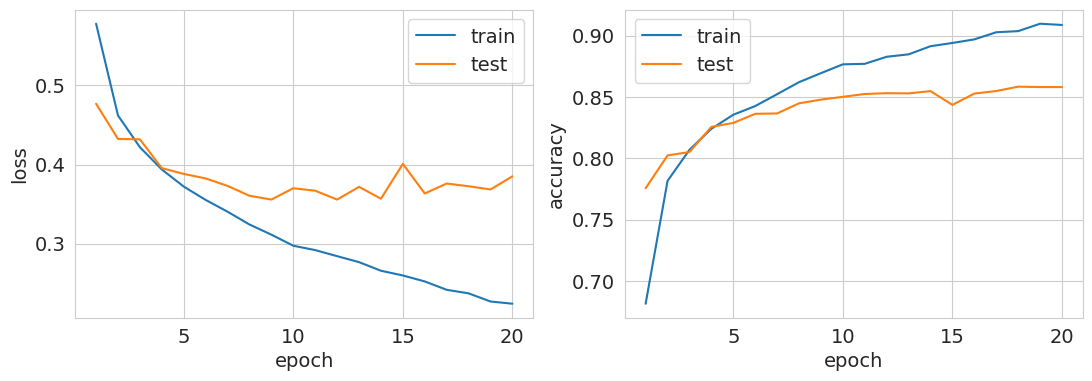

Best test accuracy: 0.85832


In [ ]:
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []
num_epochs = 20

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss, running_accuracy = 0.0, 0.0
    for tokens, labels in tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}'):
        optimizer.zero_grad()
        tokens = tokens.to(device)
        labels = labels.to(device)

        logits, _ = model(tokens)
        probs = torch.sigmoid(logits.squeeze(1))
        loss = criterion(probs, labels.to(torch.float))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * tokens.shape[0]
        running_accuracy += ((probs > 0.5).to(torch.int) == labels).sum().item()

    train_losses += [running_loss / len(train_loader.dataset)]
    train_accuracies += [running_accuracy / len(train_loader.dataset)]

    model.eval()
    running_loss, running_accuracy = 0.0, 0.0
    for tokens, labels in tqdm(test_loader, desc=f'Testing {epoch}/{num_epochs}'):
        tokens = tokens.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            logits, _ = model(tokens)
            probs = torch.sigmoid(logits.squeeze(1))
            loss = criterion(probs, labels.to(torch.float))

        running_loss += loss.item() * tokens.shape[0]
        running_accuracy += ((probs > 0.5).to(torch.int) == labels).sum().item()

    test_losses += [running_loss / len(test_loader.dataset)]
    test_accuracies += [running_accuracy / len(test_loader.dataset)]
    plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)

print(f'Best test accuracy: {max(test_accuracies)}')